In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from stats_functions import *

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_6296/480481023.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
index = "^GSPC"
stock = "TTEK"
# Tetra Tech engineering services 
period = "3y"
interval = "1wk"

In [3]:
index_data = get_price_data(index, period=period, interval=interval)
stock_data = get_price_data(stock, period=period, interval=interval)


data = pd.merge(index_data, stock_data, left_index=True, right_index=True)
data[f"{index}_return"] = data[index].pct_change()
data[f"{stock}_return"] = data[stock].pct_change()
data.dropna(inplace=True)
X = data[f"{index}_return"].values
y = data[f"{stock}_return"].values
X = sm.add_constant(X)

## OLS Regression

In [4]:
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           6.65e-20
Time:                        19:26:38   Log-Likelihood:                 308.92
No. Observations:                 156   AIC:                            -613.8
Df Residuals:                     154   BIC:                            -607.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.003      0.235      0.8

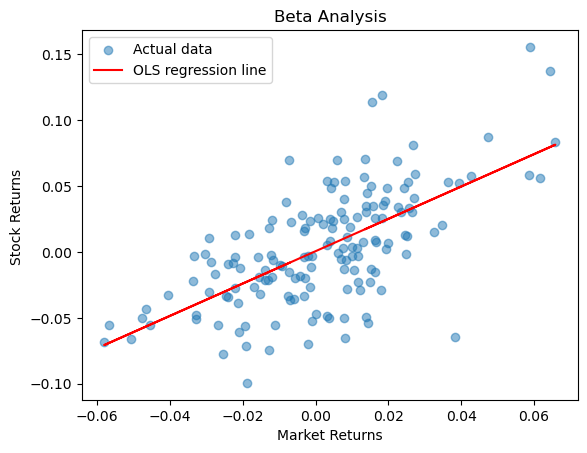

In [5]:
X_plot = X[:, 1]
plt.scatter(X_plot, y, alpha=0.5, label="Actual data")
plt.plot(X_plot, ols.fittedvalues, "r", label="OLS regression line")
plt.xlabel("Market Returns")
plt.ylabel("Stock Returns ")
plt.title("Beta Analysis")
plt.legend()
plt.show()

# QQ Plot to see the distribution of the residuals

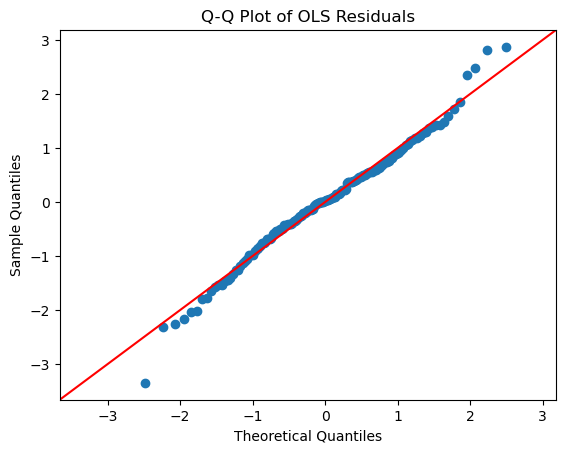

In [6]:
fig = sm.qqplot(ols.resid, line="45", fit=True)
plt.title("Q-Q Plot of OLS Residuals")
plt.show()

## Breusch Pagan Test for heteroskedasticity

In [7]:
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(
    ols.resid, ols.model.exog
)
print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

Lagrange multiplier statistic: 5.090701903677305
Lagrange multiplier p-value:   0.02405445392670586
F-statistic:                   5.194962159759772
P-value of F-statistic:        0.024026114174972007


## Refitting with robust standard errors if p_value < .05
notice the differences in the standard error and the confidence interval

In [8]:
ols = sm.OLS(y, X).fit(cov_type="HC1")
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.95e-20
Time:                        19:26:39   Log-Likelihood:                 308.92
No. Observations:                 156   AIC:                            -613.8
Df Residuals:                     154   BIC:                            -607.7
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.003      0.240      0.8